# Data Analysis of the Chicago Dataset

In this Jupyter Notebook we will analyze a bike sharing dataset of the city Chicago of the year 2019. We will also include the hourly weather data of the city during the same time. In the first part we will visualize the data and try to develop a deep understanding of the user types and recurring bahavioral patterns. In the second part we use this knowledge to develop a predicition model which forecasts future demand.

## Getting started: importing the data and getting it in the right format

At first we import all of the required libraries in this notebook. In this case we import *NumPy, Pandas, Matplotlib and Seaborn*. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Next we import the datasets. This is in perticular the dataset of the city Chicago of the year 2019 and the associated weather data. We do this with the library Pandas, therefore both datasets have now the datatype "Pandas Dataframe" ([documentation](https://pandas.pydata.org/docs/reference/frame.html)).

In [6]:
chicago_set = pd.read_csv("C:\\Users\\sebas\\Desktop\\DSML\\Projektordner\\chicago_2019.csv")
weather_set = pd.read_csv("C:\\Users\\sebas\\Desktop\\DSML\\Projektordner\\weather_hourly_chicago.csv")

We use the commands head() and info() to get a feeling for the data

In [7]:
chicago_set.head()


,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber


In [8]:
chicago_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818004 entries, 0 to 3818003
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   start_time          object
 1   end_time            object
 2   start_station_id    int64 
 3   end_station_id      int64 
 4   start_station_name  object
 5   end_station_name    object
 6   bike_id             int64 
 7   user_type           object
dtypes: int64(3), object(5)
memory usage: 233.0+ MB


So we know that we have a dataset with 3.8 million entries and we have multiple columns, two columns for the time (*start_time and end_time*), four columns for the location (*start_station_id, end_station_id and the respective names*) and the *bike_id* and *user_type*. 

In [9]:
weather_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43788 non-null  object 
 1   max_temp   43788 non-null  float64
 2   min_temp   43788 non-null  float64
 3   precip     43790 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


We first investigate the time data we got. Therefore, we need to transform the data type of the columns "*start_time*" and "*end_time*" from String to Panda Datetime. This allows us in the following code snippet to add another column to our dataframe which we call *duration*. This is the difference between the end_time and the start_time. 

In [10]:
chicago_set['start_time'] = pd.to_datetime(chicago_set['start_time'])
chicago_set['end_time'] = pd.to_datetime(chicago_set['end_time'])

chicago_set['duration'] = chicago_set['end_time'] - chicago_set['start_time']
chicago_set.describe()

,start_station_id,end_station_id,bike_id,duration
count,3.818004e+06,3.818004e+06,3.818004e+06,3818004
mean,2.016659e+02,2.026363e+02,3.380252e+03,0 days 00:24:10.451397903
std,1.560798e+02,1.562388e+02,1.902511e+03,0 days 08:17:32.263421746
min,1.000000e+00,1.000000e+00,1.000000e+00,-1 days +23:03:38
25%,7.700000e+01,7.700000e+01,1.727000e+03,0 days 00:06:51
50%,1.740000e+02,1.740000e+02,3.451000e+03,0 days 00:11:49
75%,2.890000e+02,2.910000e+02,5.046000e+03,0 days 00:21:24
max,6.730000e+02,6.730000e+02,6.946000e+03,123 days 01:20:22


We calculated the duration of the rides and see that the maximum duration of a ride was over 123 days. We can assume that there a other cases where the data is inconclusive, therefore we will clean our dataset and delete those wrong outliners.

## Cleaning up our data

### Examples of invalid data

In [11]:
import datetime
chicago_set[chicago_set['duration'] >= datetime.timedelta(days=1)].sample(n=5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration
2445776,2019-08-22 16:14:59,2019-10-01 09:45:14,529,62,Cicero Ave & Lake St,McCormick Place,2764,Customer,39 days 17:30:15
3794342,2019-12-25 12:55:41,2019-12-30 09:58:53,76,671,Lake Shore Dr & Monroe St,HUBBARD ST BIKE CHECKING (LBS-WH-TEST),2582,Customer,4 days 21:03:12
3295028,2019-10-14 10:27:10,2019-11-02 10:00:34,145,337,Mies van der Rohe Way & Chestnut St,Clark St & Chicago Ave,3566,Customer,18 days 23:33:24
197291,2019-02-28 15:18:07,2019-03-05 15:16:01,312,220,Clarendon Ave & Gordon Ter,Clark St & Drummond Pl,1654,Customer,4 days 23:57:54
3284776,2019-10-13 11:33:20,2019-10-14 14:44:25,137,120,Morgan Ave & 14th Pl,Wentworth Ave & Cermak Rd (Temp),68,Customer,1 days 03:11:05


In [12]:
chicago_set[chicago_set['duration'] <= datetime.timedelta(days=0)].sample(n=5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration
3498435,2019-11-03 01:47:49,2019-11-03 01:02:40,229,87,Southport Ave & Roscoe St,Racine Ave & Fullerton Ave,964,Subscriber,-1 days +23:14:51
3498442,2019-11-03 01:53:10,2019-11-03 01:04:53,177,327,Theater on the Lake,Sheffield Ave & Webster Ave,5877,Customer,-1 days +23:11:43
3498443,2019-11-03 01:53:24,2019-11-03 01:06:08,484,484,Monticello Ave & Irving Park Rd,Monticello Ave & Irving Park Rd,3984,Customer,-1 days +23:12:44
3498441,2019-11-03 01:53:08,2019-11-03 01:04:53,177,327,Theater on the Lake,Sheffield Ave & Webster Ave,2142,Customer,-1 days +23:11:45
3498440,2019-11-03 01:51:55,2019-11-03 01:04:33,177,327,Theater on the Lake,Sheffield Ave & Webster Ave,3338,Customer,-1 days +23:12:38


### Visualization of different quantile deletion of outlierts & invalid data from our data set

(0.125% Quantile) All trips with a duration outside of 0 days 00:01:19 to 0 days 09:01:02.970000002 will be removed!
That is 9263 out of 3818004 entries!


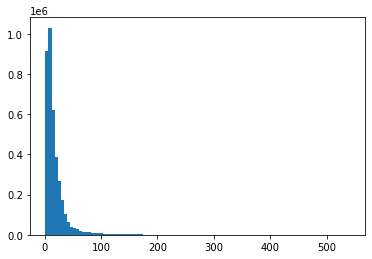

count                      3808741
mean     0 days 00:18:22.340564506
std      0 days 00:23:21.735330331
min                0 days 00:01:19
25%                0 days 00:06:52
50%                0 days 00:11:49
75%                0 days 00:21:21
max                0 days 09:00:59
Name: duration, dtype: object

(0.25% Quantile) All trips with a duration outside of 0 days 00:01:33 to 0 days 03:48:11.992500 will be removed!
That is 19025 out of 3818004 entries!


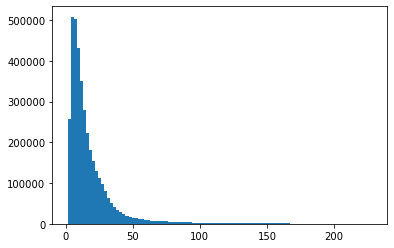

count                      3798979
mean     0 days 00:18:00.690816927
std      0 days 00:20:31.001258644
min                0 days 00:01:33
25%                0 days 00:06:53
50%                0 days 00:11:49
75%                0 days 00:21:19
max                0 days 03:48:11
Name: duration, dtype: object

(0.5% Quantile) All trips with a duration outside of 0 days 00:01:49 to 0 days 02:42:28 will be removed!
That is 37931 out of 3818004 entries!


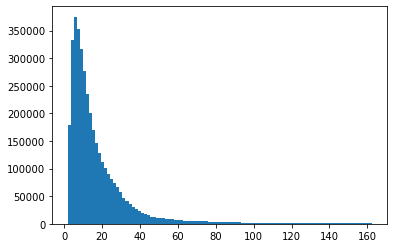

count                      3780073
mean     0 days 00:17:37.940601940
std      0 days 00:18:45.168339717
min                0 days 00:01:49
25%                0 days 00:06:54
50%                0 days 00:11:49
75%                0 days 00:21:15
max                0 days 02:42:28
Name: duration, dtype: object



In [13]:
%matplotlib inline
# Data to remove from top and bottom
def get_outside_time_frame_data(df, dt_column, lower_bound, upper_bound):
    return df[(df[dt_column] < lower_bound) | (df[dt_column] > upper_bound)]

quantiles = [0.00125, 0.0025, 0.005] # (0.125%; 0.25%; 0.5%) * 2
for quantile in quantiles:
    # amount = len(chicago_set[(chicago_set['duration'] < chicago_set.duration.quantile(quantile)) | (chicago_set['duration'] > chicago_set.duration.quantile(1 - quantile))])
    lower_bound = chicago_set.duration.quantile(quantile)
    upper_bound = chicago_set.duration.quantile(1 - quantile)
    amount = get_outside_time_frame_data(chicago_set, 'duration', lower_bound, upper_bound)
    print('(' + str(quantile*100) + '% Quantile) All trips with a duration outside of ' + str(lower_bound) + ' to ' + str(upper_bound) + ' will be removed!')
    print('That is ' + str(len(amount)) + ' out of ' + str(len(chicago_set)) + ' entries!')
    chicago_set_clean = chicago_set.drop(amount.index)
    plt.hist(chicago_set_clean['duration']/pd.Timedelta(minutes=1), bins=100)
    plt.show()
    print(str(chicago_set_clean['duration'].describe()) + '\n')

## Analysis of the adjusted dataset

### Extract week day as String and numeral from start time

In [14]:
chicago_set['day_of_week_name'] = chicago_set['start_time'].dt.day_name()
chicago_set['day_of_week'] = chicago_set['start_time'].dt.dayofweek
chicago_set.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration,day_of_week_name,day_of_week
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,0 days 00:06:30,Tuesday,1
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,0 days 00:07:21,Tuesday,1
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,0 days 00:13:49,Tuesday,1
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,0 days 00:29:43,Tuesday,1
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,0 days 00:06:04,Tuesday,1


### Hot-encode weekday: turn number for day into boolean

In [15]:
chicago_set['monday'] = np.where(chicago_set['day_of_week'] == 0, 1, 0) #[chicago_set['day_of_week'] == 1]
day = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']
for i in range(0,6):
    chicago_set[day[i]] = np.where(chicago_set['day_of_week'] == i, 1, 0)
    
chicago_set.sample(n=5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration,day_of_week_name,day_of_week,monday,tuesday,wednesday,thursday,friday,saturday
1249680,2019-06-17 19:20:55,2019-06-17 19:23:26,303,232,Broadway & Cornelia Ave,Pine Grove Ave & Waveland Ave,1618,Subscriber,0 days 00:02:31,Monday,0,1,0,0,0,0,0
3253044,2019-10-10 09:26:04,2019-10-10 09:38:18,268,331,Lake Shore Dr & North Blvd,Halsted St & Clybourn Ave,1651,Subscriber,0 days 00:12:14,Thursday,3,0,0,0,1,0,0
430495,2019-04-08 17:44:52,2019-04-08 17:49:24,33,623,State St & Van Buren St,Michigan Ave & 8th St,2700,Subscriber,0 days 00:04:32,Monday,0,1,0,0,0,0,0
3500367,2019-11-03 12:21:09,2019-11-03 13:40:07,43,673,Michigan Ave & Washington St,Lincoln Park Conservatory,5203,Customer,0 days 01:18:58,Sunday,6,0,0,0,0,0,0
1417082,2019-06-27 18:44:43,2019-06-27 19:10:00,486,156,Oakley Ave & Irving Park Rd,Clark St & Wellington Ave,2869,Subscriber,0 days 00:25:17,Thursday,3,0,0,0,1,0,0


In the following part we will create a variable *fleet_size* which we will use later to determine the availability of bikes for specific times. 

In [16]:
fleet_size = len(chicago_set['bike_id'].unique())

#capacity_per_hour -> connect the fleet_size with the time to predict at what times in which areas we need to do something


## Analyzing the location data

In the following part we try to visualize our data set. We want to make clear which time factory like months, time or weekday has influence on the demand. Furthermore, we try to find patterns of the duration and the time the service is getting used.

## Importing a dataset to findout the latitude and longitude of the stations

In [17]:
coordinates_set = pd.read_csv("C:\\Users\\sebas\\Desktop\\DSML\\Projektordner\\202004-divvy-tripdata.csv")
coordinates_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84776 entries, 0 to 84775
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             84776 non-null  object 
 1   rideable_type       84776 non-null  object 
 2   started_at          84776 non-null  object 
 3   ended_at            84776 non-null  object 
 4   start_station_name  84776 non-null  object 
 5   start_station_id    84776 non-null  int64  
 6   end_station_name    84677 non-null  object 
 7   end_station_id      84677 non-null  float64
 8   start_lat           84776 non-null  float64
 9   start_lng           84776 non-null  float64
 10  end_lat             84677 non-null  float64
 11  end_lng             84677 non-null  float64
 12  member_casual       84776 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 8.4+ MB


## Get the relevant data, i.e. station_name, station_id, latitude & longitude

In [21]:
coordinates1 = coordinates_set[['start_station_name', 'start_station_id', 'start_lat', 'start_lng']]
coordinates2 = coordinates_set[['end_station_name', 'end_station_id', 'end_lat', 'end_lng']]

coordinates1.rename(columns={'start_station_name': 'station_name', 'start_station_id': 'station_id', 'start_lat': 'latitude', 'start_lng':'longitude'}, inplace=True)
coordinates2.rename(columns={'end_station_name': 'station_name', 'end_station_id': 'station_id', 'end_lat': 'latitude', 'end_lng':'longitude'}, inplace=True)

coordinates = pd.concat([coordinates1, coordinates2], ignore_index = True)
coordinates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169552 entries, 0 to 169551
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   station_name  169453 non-null  object 
 1   station_id    169453 non-null  float64
 2   latitude      169453 non-null  float64
 3   longitude     169453 non-null  float64
dtypes: float64(3), object(1)
memory usage: 5.2+ MB


In [22]:
coordinates['station_id'] = coordinates['station_id'].replace([np.inf, -np.inf], np.nan)
coordinates_dropped = coordinates.dropna()
coordinates_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169453 entries, 0 to 169551
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   station_name  169453 non-null  object 
 1   station_id    169453 non-null  float64
 2   latitude      169453 non-null  float64
 3   longitude     169453 non-null  float64
dtypes: float64(3), object(1)
memory usage: 6.5+ MB


## Calculate the net distances between the stations

# In our next step, we want to create a heat map of the bike trips used in our data sets. In order to be able to visualize this, we need to install the "ipyleaflet" extension using the following two commands (installment and enabling of the extension):

In [ ]:
import ipyleaflet

In [ ]:
from ipyleaflet import (Map,DrawControl)
myMap=Map(center=[41.8758,-87.7553], zoom=20)
ChicagoCity=DrawControl(circle={'shapeOptions':{'color':'#8B0000'}})
myMap.add_control(ChicagoCity)
myMap

#### Get all unique rows based on station_id

In [ ]:
coordinates_unique = coordinates_dropped.drop_duplicates(subset = ['station_id'], keep = 'last')
#coordinates_unique['station_id'] = coordinates_unique['station_id'].replace([np.inf, -np.inf], np.nan)
coordinates_unique = coordinates_unique.dropna()
coordinates_unqiue.info()

In [ ]:
coordinates_unique = coordinates_unique[np.isfinite(coordinates_unique['station_id'])]
coordinates_unique.head()

In [ ]:
coordinates_unique['station_id'] = coordinates_unique['station_id'].astype('int64')
coordinates_unique.info()

In [ ]:
coordinates_unique.head()

In [ ]:
chicago_set_merge = chicago_set_clean.merge(coordinates_unique, how='left', left_on='start_station_id', right_on='station_id')
chicago_set_merge.head()

In [ ]:
chicago_set_merge.info()